In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Milan = pd.read_csv('../ValoresAtipicosMilan.csv')

In [3]:
# Verificamos información del dataframe
Milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23705 non-null  int64  
 1   last_scraped                                  23705 non-null  object 
 2   name                                          23705 non-null  object 
 3   host_id                                       23705 non-null  int64  
 4   host_name                                     23705 non-null  object 
 5   host_since                                    23705 non-null  object 
 6   host_response_time                            23705 non-null  object 
 7   host_is_superhost                             23705 non-null  object 
 8   host_identity_verified                        23705 non-null  object 
 9   neighbourhood                                 23705 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Milan['host_total_listings_count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23705 entries, 0 to 23704
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
23705 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Milan['host_total_listings_count'].max()
Min = Milan['host_total_listings_count'].min()
Limites = [Min, Max]
Limites

[1.0, 474.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

473.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 23706

ni = 1 + 3.32 * np.log10(n)
ni

15.524529489816098

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

30.467912107112955

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [10]:
# Categorización de variables
intervalos = np.linspace (1, 474, 16)
intervalos

array([  1.        ,  32.53333333,  64.06666667,  95.6       ,
       127.13333333, 158.66666667, 190.2       , 221.73333333,
       253.26666667, 284.8       , 316.33333333, 347.86666667,
       379.4       , 410.93333333, 442.46666667, 474.        ])

In [11]:
# Creamos las categorías
categorias = [
    "Anuncio único",
    "Poco experimentado",
    "Anuncio limitado",
    "Anuncio básico",
    "Anuncio estándar",
    "Anuncio amplio",
    "Anuncio avanzado",
    "Anuncio variado",
    "Anuncio considerable",
    "Anuncio destacado",
    "Anuncio con varios tipos",
    "Anuncio frecuente",
    "Anuncios muy variados",
    "Anuncios sobresalientes",
    "Anuncios múltiples"
]

In [12]:
# Creamos las ctegorias en la columna numerica
Milan['host_total_listings_count'] = pd.cut ( x = Milan ['host_total_listings_count'], bins = intervalos, labels = categorias )
Milan['host_total_listings_count']

0        Anuncio único
1                  NaN
2        Anuncio único
3        Anuncio único
4        Anuncio único
             ...      
23700              NaN
23701    Anuncio único
23702    Anuncio único
23703    Anuncio único
23704    Anuncio único
Name: host_total_listings_count, Length: 23705, dtype: category
Categories (15, object): ['Anuncio único' < 'Poco experimentado' < 'Anuncio limitado' < 'Anuncio básico' ... 'Anuncio frecuente' < 'Anuncios muy variados' < 'Anuncios sobresalientes' < 'Anuncios múltiples']

In [14]:
table1 = freq_tbl(Milan['host_total_listings_count'])
table1

,host_total_listings_count,frequency,percentage,cumulative_perc
0,Anuncio único,12270,0.517612,0.733369
1,Poco experimentado,1159,0.048893,0.802642
2,Anuncio básico,785,0.033115,0.849561
3,Anuncio limitado,752,0.031723,0.894507
4,Anuncio estándar,608,0.025649,0.930847
5,Anuncio amplio,451,0.019026,0.957803
6,Anuncios sobresalientes,342,0.014427,0.978244
7,Anuncio variado,128,0.005400,0.985894
8,Anuncio avanzado,118,0.004978,0.992947
9,Anuncios múltiples,86,0.003628,0.998087


In [15]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,host_total_listings_count,frequency
0,Anuncio único,12270
1,Poco experimentado,1159
2,Anuncio básico,785
3,Anuncio limitado,752
4,Anuncio estándar,608
5,Anuncio amplio,451
6,Anuncios sobresalientes,342
7,Anuncio variado,128
8,Anuncio avanzado,118
9,Anuncios múltiples,86


In [16]:
# Obtener un filtro de los valores más relevantes de las vaiables categóricas seleccionadas

Filtro = table2[ table2['frequency'] >= 26]
Filtro

,host_total_listings_count,frequency
0,Anuncio único,12270
1,Poco experimentado,1159
2,Anuncio básico,785
3,Anuncio limitado,752
4,Anuncio estándar,608
5,Anuncio amplio,451
6,Anuncios sobresalientes,342
7,Anuncio variado,128
8,Anuncio avanzado,118
9,Anuncios múltiples,86


In [17]:
# Ajusto el indice de mi data frame

Filtro_index = Filtro.set_index('host_total_listings_count')
Filtro_index

,frequency
host_total_listings_count,
Anuncio único,12270
Poco experimentado,1159
Anuncio básico,785
Anuncio limitado,752
Anuncio estándar,608
Anuncio amplio,451
Anuncios sobresalientes,342
Anuncio variado,128
Anuncio avanzado,118


<Axes: xlabel='host_total_listings_count'>

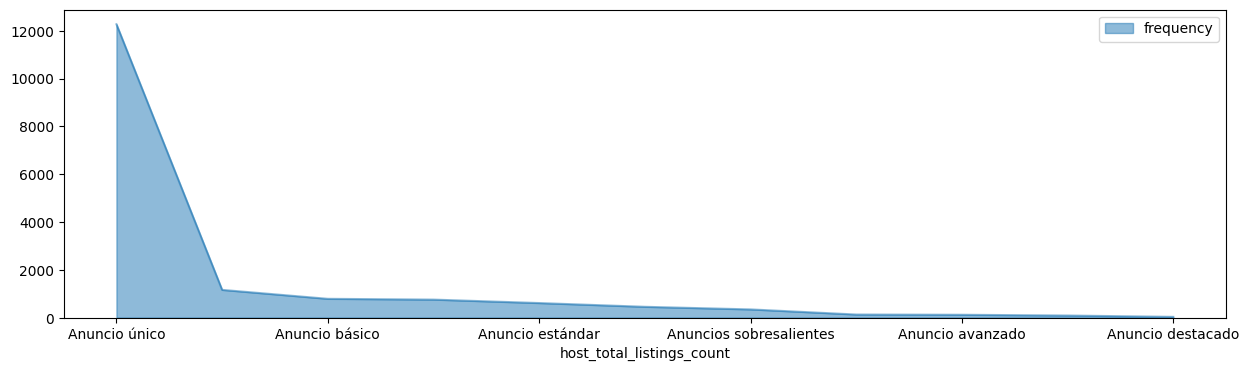

In [18]:
# Realizamos gráfico de area del dataframe filtrado
Filtro_index.plot(kind = 'area', figsize = (15,4), alpha = 0.5)